# Ex. Solving an ODE with Symbolic Math

In [1]:
import numpy as np
import sympy
from scipy import integrate
import matplotlib.pyplot as plt
import ipywidgets

In [2]:
sympy.init_printing()

## Harmonic Oscillator

### Symbolic Manipulation (with SymPy)

In [3]:
t = sympy.Symbol("t")
omega0 = sympy.Symbol("omega0")
x = sympy.Function('x')

In [4]:
ode = x(t).diff(t, 2) + omega0**2 * x(t)

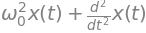

In [5]:
ode

In [6]:
ode_sol = sympy.dsolve(ode)

In [7]:
ode_sol

In [8]:
ode_sol.rhs

In [9]:
# initial conditions
ics = {x(0): 2, x(t).diff(t).subs(t, 0): 3}

In [10]:
ics

⎧         ⎛d       ⎞│      ⎫
⎨x(0): 2, ⎜──(x(t))⎟│   : 3⎬
⎩         ⎝dt      ⎠│t=0   ⎭

In [11]:
ode_sol = sympy.dsolve(ode,ics=ics)

In [12]:
ode_sol

In [13]:
ode_sol.rewrite(sympy.cos).simplify()

In [14]:
ics

⎧         ⎛d       ⎞│      ⎫
⎨x(0): 2, ⎜──(x(t))⎟│   : 3⎬
⎩         ⎝dt      ⎠│t=0   ⎭

In [15]:
ode_sol = sympy.dsolve(ode)

In [16]:
ode_sol

In [17]:
ode_sol.free_symbols

In [18]:
ode_sol.free_symbols - {omega0}

In [19]:
(ode_sol.lhs.diff(t,0) - ode_sol.rhs.diff(t,0)).subs(t,0)

In [20]:
(ode_sol.lhs.diff(t,0) - ode_sol.rhs.diff(t,0)).subs(t,0).subs(ics)

In [21]:
(ode_sol.lhs.diff(t,1) - ode_sol.rhs.diff(t,1)).subs(t,0)

                    ⎛d       ⎞│   
ⅈ⋅C₁⋅ω₀ - ⅈ⋅C₂⋅ω₀ + ⎜──(x(t))⎟│   
                    ⎝dt      ⎠│t=0

In [22]:
(ode_sol.lhs.diff(t,1) - ode_sol.rhs.diff(t,1)).subs(t,0).subs(ics)

In [23]:
eqs = [(ode_sol.lhs.diff(t, n) - ode_sol.rhs.diff(t, n)).subs(t, 0).subs(ics)
       for n in range(len(ics))]

In [24]:
eqs

In [25]:
ode_sol.free_symbols - {omega0}

In [26]:
sympy.solve(eqs, ode_sol.free_symbols - set([omega0]))

In [27]:
sol_params = sympy.solve(eqs, ode_sol.free_symbols - set([omega0]))

In [28]:
x_t_sol = ode_sol.subs(sol_params)

In [29]:
x_t_sol

In [30]:
x_t_sol.rewrite(sympy.cos).simplify()

Let's use lambdify to plot: "The primary purpose of this function [lambdify] is to provide a bridge from SymPy expressions to numerical libraries such as NumPy, SciPy, NumExpr, mpmath, and tensorflow."

In [31]:
square = sympy.lambdify(t, t**2)

In [32]:
square(6)

In [33]:
np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [34]:
square(np.linspace(0,1,10))

array([0.        , 0.01234568, 0.04938272, 0.11111111, 0.19753086,
       0.30864198, 0.44444444, 0.60493827, 0.79012346, 1.        ])

In [35]:
sympy.lambdify?

In [36]:
expr_func = sympy.lambdify(t, x_t_sol.rhs.subs(omega0,1), 'numpy')

In [37]:
xvalues = np.linspace(0, 10, 30)

In [38]:
expr_func(xvalues)

array([ 2.        +0.j,  2.89637075+0.j,  3.45174452+0.j,  3.60073577+0.j,
        3.32580338+0.j,  2.65931584+0.j,  1.67974038+0.j,  0.50240489+0.j,
       -0.73407999+0.j, -1.8841398 +0.j, -2.81237511+0.j, -3.40950246+0.j,
       -3.60522055+0.j, -3.376487  +0.j, -2.75023118+0.j, -1.80018376+0.j,
       -0.63819621+0.j,  0.59892779+0.j,  1.76553852+0.j,  2.72428797+0.j,
        3.36230019+0.j,  3.60446039+0.j,  3.42225844+0.j,  2.83714544+0.j,
        1.91800821+0.j,  0.77305907+0.j, -0.46290426+0.j, -1.6443687 +0.j,
       -2.6322375 +0.j, -3.31020639+0.j])

/Users/bwinjum/opt/anaconda3/envs/jb-env/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


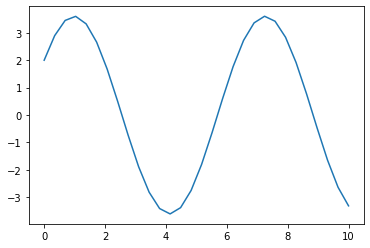

In [39]:
plt.plot(xvalues,expr_func(xvalues));